In [473]:
import numpy as np

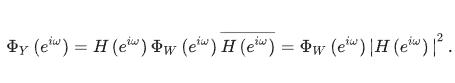

In [474]:
def H(q, b_1, b_2):
    return 1 + b_1 * q**(-1) + b_2 * q**(-2)

def Phi_Y(omega, b_1, b_2, sigma2):
    return sigma2 * np.abs(H(np.exp(1j*omega), b_1, b_2))**2

b_1 = 1
b_2 = 1
sigma2 = 1
omega = 0

Phi_Y(omega, b_1, b_2, sigma2)

9.0

In [475]:
X = np.array([1, 2, 3, 4])[:, np.newaxis]
Y = np.array([1, 2, 3, 3])[:, np.newaxis]

1/30 * 26

0.8666666666666667

In [476]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[0.8667]])

________________

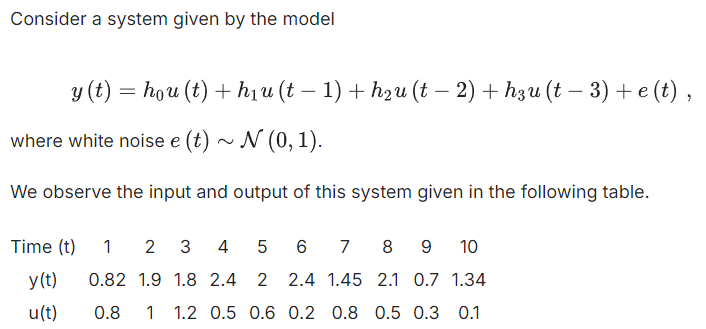

In [477]:
import pandas as pd
from matplotlib import pyplot as plt

y = np.append(np.zeros(3), np.array([0.82, 1.9, 1.8, 2.4, 2, 2.4, 1.45, 2.1, 0.7, 1.34]))
u = np.append(np.zeros(3), np.array([0.8, 1, 1.2, 0.5, 0.6, 0.2, 0.8, 0.5, 0.3, 0.1]))

df = pd.DataFrame(np.array([u, y]).T, index=np.arange(-2, 11))
df.columns = ["u", "y"]
df

,u,y
-2,0.0,0.00
-1,0.0,0.00
0,0.0,0.00
1,0.8,0.82
2,1.0,1.90
3,1.2,1.80
4,0.5,2.40
5,0.6,2.00
6,0.2,2.40
7,0.8,1.45


In [478]:
X = [(df.loc[i:i+3].u).reset_index(drop=True) for i in range(-2, 8)]
Y = df[df.index > 0].y.to_numpy()

X = pd.DataFrame(X, index=range(1, 11)).to_numpy()

# print(type(X))
# print("length =", len(X))
print("X:\n", X)
print("_"*40)
print("Y:\n", Y)

X:
 [[0.  0.  0.  0.8]
 [0.  0.  0.8 1. ]
 [0.  0.8 1.  1.2]
 [0.8 1.  1.2 0.5]
 [1.  1.2 0.5 0.6]
 [1.2 0.5 0.6 0.2]
 [0.5 0.6 0.2 0.8]
 [0.6 0.2 0.8 0.5]
 [0.2 0.8 0.5 0.3]
 [0.8 0.5 0.3 0.1]]
________________________________________
Y:
 [0.82 1.9  1.8  2.4  2.   2.4  1.45 2.1  0.7  1.34]


In [479]:
def calc_LSE(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

def calc_covar_LSE(X, sigma2=1):
    return sigma2 * np.linalg.inv(X.T @ X)

def calc_std_LSE(X, sigma2=1):
    return np.sqrt(np.diag(calc_covar_LSE(X, sigma2)))

def calc_bi(X, Y, q, sigma2=1):
    theta_hat = calc_LSE(X, Y)
    theta_hat_std_diag = calc_std_LSE(X, sigma2)
    # TODO


In [480]:
h_hat = calc_LSE(X, Y)

h_hat

array([ 1.5277, -0.5612,  1.0246,  1.0355])

In [481]:
h_mean = h_hat
h_var = calc_covar_LSE(X)
h_var

array([[ 0.706 , -0.4987, -0.2392,  0.2122],
       [-0.4987,  0.9587, -0.2628, -0.2107],
       [-0.2392, -0.2628,  0.9715, -0.4931],
       [ 0.2122, -0.2107, -0.4931,  0.6518]])

In [482]:
h_std_diag = calc_std_LSE(X)
h_std_diag

array([0.8402, 0.9791, 0.9857, 0.8074])

In [483]:
import sympy as sp

a = sp.Symbol("a")
b = sp.Symbol("b")
c = sp.Symbol("c")


a_hat = a - (c * (1-a**2) / (1 + c**2 - 2*a*c))
b_hat = b - b*c*((1-a) / (1 + c**2 - 2*a*c))

sp.simplify(a_hat + b_hat)

(b*c*(a - 1) + c*(a**2 - 1) + (a + b)*(-2*a*c + c**2 + 1))/(-2*a*c + c**2 + 1)

In [484]:
alphas = np.array([3/2, -3/4, 1/8])
alphas

array([ 1.5  , -0.75 ,  0.125])

In [485]:
def calc_eq_right(tau, alphas, sigma2=1):
    p = len(alphas)
    R_arr = [sp.Symbol(f"R_{i}") for i in range(p+1)]

    eq_right = 0
    for i in range(1, p+1):
        eq_right += R_arr[abs(tau - i)] * alphas[i-1]
    
    if tau == 0:
        eq_right += sigma2

    return eq_right

alphas = np.array([3/2, -3/4, 1/8])
calc_eq_right(0, alphas)

1.5*R_1 - 0.75*R_2 + 0.125*R_3 + 1

In [486]:
def calc_equations(alphas, sigma2=1):
    p = len(alphas)
    equations = []

    for tau in range(p+1):
        eq = sp.Eq(sp.Symbol(f"R_{tau}"), calc_eq_right(tau, alphas, sigma2))
        equations.append(eq)
    
    return equations

equations = calc_equations(alphas)
equations

[Eq(R_0, 1.5*R_1 - 0.75*R_2 + 0.125*R_3 + 1),
 Eq(R_1, 1.5*R_0 - 0.75*R_1 + 0.125*R_2),
 Eq(R_2, -0.75*R_0 + 1.625*R_1),
 Eq(R_3, 0.125*R_0 - 0.75*R_1 + 1.5*R_2)]

In [487]:
alphas = np.array([3/2, -3/4, 1/8])
p = len(alphas)
# Generate R symbols
R_arr = [sp.Symbol(f"R_{i}") for i in range(p+1)]

# Solve the system of equations
solution = sp.solve(equations, R_arr)

# Print the solution
solution

{R_0: 8.69135802469136,
 R_1: 7.90123456790124,
 R_2: 6.32098765432099,
 R_3: 4.64197530864198}

In [488]:
def solve_ARp_yulewalker(alphas, sigma2=1):
    # Solves the values of autocorrelation function
    # in an AR(p) process with Yule-Walker equations
    equations = calc_equations(alphas)
    p = len(alphas)

    # Generate R symbols
    R_arr = [sp.Symbol(f"R_{i}") for i in range(p+1)]

    # Solve the system of equations
    solution = sp.solve(equations, R_arr)

    return solution

In [489]:
solve_ARp_yulewalker(alphas)

{R_0: 8.69135802469136,
 R_1: 7.90123456790124,
 R_2: 6.32098765432099,
 R_3: 4.64197530864198}

In [490]:
H = sp.Symbol("H_q")
q = sp.symbols("q", complex=True)

H = 1 - (3/2 * q**(-1) - 3/4 * q**(-2) + 1/8 * q**(-3))
H

1 - 1.5/q + 0.75/q**2 - 0.125/q**3

In [491]:
roots = sp.solve(H)
roots

[0.500000000000000]

In [492]:
x_t = pd.Series([-1, 0, 1, 0, -1, 0, 1, 0])

def autocov(series, tau):
    T = len(series)
    return 1/T * np.dot(series, series.shift(tau).fillna(0))

for i in range(6):
    print(f"rho({i}) =", autocov(x_t, i))


rho(0) = 0.5
rho(1) = 0.0
rho(2) = -0.375
rho(3) = 0.0
rho(4) = 0.25
rho(5) = 0.0


______________

# CPI fitting

In [493]:
data = pd.read_csv(r"C:\Users\adevr\WQU_DP\MITx_IDS.S24x\M1\CPI.csv")
data = data.set_index("date").dropna()
data.index = pd.to_datetime(data.index)
data.head()

,CPI
date,
2008-07-24,100.0
2008-07-25,100.0
2008-07-26,100.0
2008-07-27,100.0
2008-07-28,100.0


In [494]:
slice_date = "2013-09"
train_df = data.loc[data.index < slice_date]
test_df = data.loc[data.index >= slice_date]

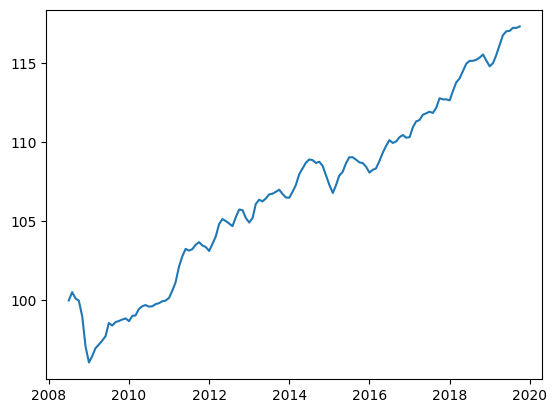

In [495]:
df_first_days = data.resample('MS').first()
plt.plot(df_first_days)

              CPI
date             
2008-07-24  100.0
2008-07-25  100.0
2008-07-26  100.0
2008-07-27  100.0
2008-07-28  100.0


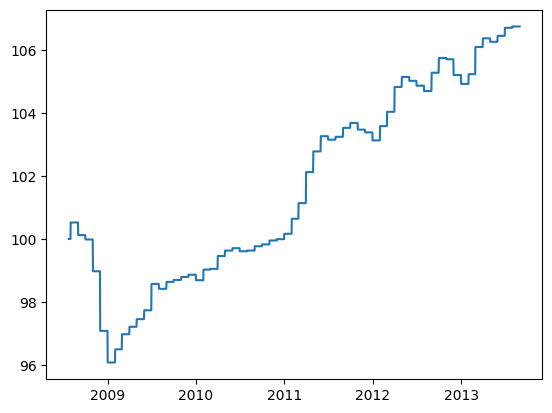

In [496]:
print(train_df.head())
plt.plot(train_df)

In [497]:
train_df_t = train_df.reset_index(drop=True)
train_df_t

,CPI
0,100.0000
1,100.0000
2,100.0000
3,100.0000
4,100.0000
...,...
1860,106.7551
1861,106.7551
1862,106.7551
1863,106.7551


### Estimate $\hat{\theta}$

In [498]:
np.set_printoptions(precision=4, suppress=True)

n = len(train_df_t)
t_arr = np.arange(n) / 30
Y = train_df_t

Phi = (np.vstack([t_arr, np.ones(n)])).T
Phi

array([[ 0.    ,  1.    ],
       [ 0.0333,  1.    ],
       [ 0.0667,  1.    ],
       ...,
       [62.0667,  1.    ],
       [62.1   ,  1.    ],
       [62.1333,  1.    ]])

In [499]:
theta_hat = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y["CPI"]
theta_hat

array([ 0.1625, 96.6179])

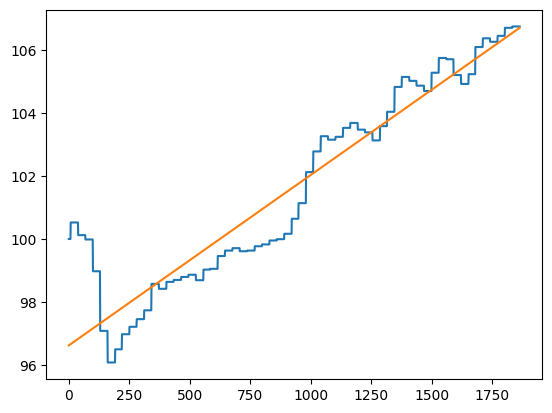

In [500]:
T = Phi @ theta_hat

R = Y["CPI"] - T
plt.plot(Y, label="Y")
plt.plot(T, label="T")

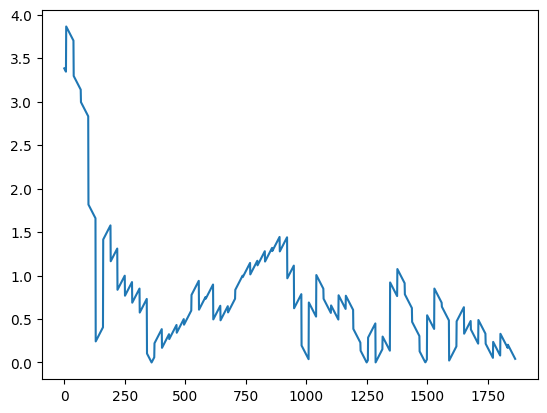

In [501]:
R_abs = np.abs(R)
plt.plot(R_abs)

In [502]:
R_abs.max()

3.863871638396347

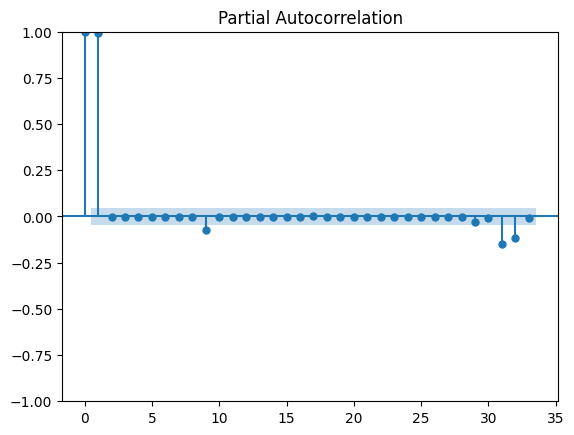

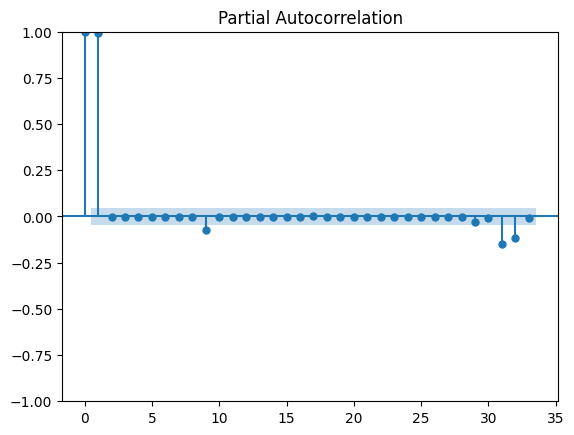

In [503]:
import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(R)

In [504]:
from statsmodels.tsa.ar_model import AutoReg

results = AutoReg(endog=R, lags=2, trend="n").fit()
results.fittedvalues

2       3.356532
3       3.351148
4       3.345764
5       3.340381
6       3.334997
          ...   
1860    0.068367
1861    0.062983
1862    0.057600
1863    0.052216
1864    0.046832
Length: 1863, dtype: float64

1.8911787784980942
params :
 CPI.L1    0.993076
CPI.L2    0.000955
dtype: float64


<Axes: >

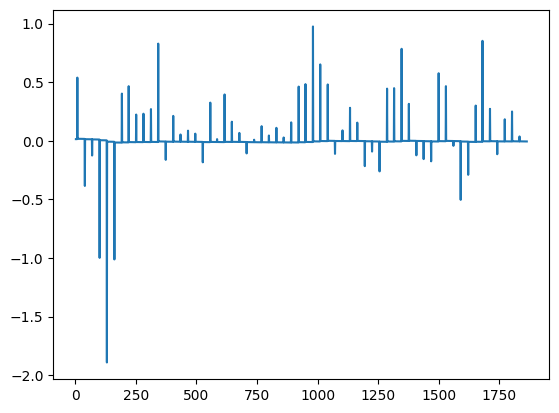

In [505]:
print(np.abs(results.resid).max())
print("params :\n", results.params)
(results.resid).plot()

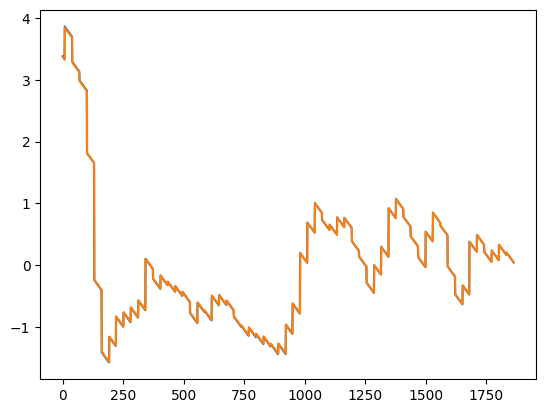

In [506]:
plt.plot(R)
plt.plot(results.fittedvalues)